In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

# Afficher les images

In [41]:
picture_size = 48
folder_path = "../images/train" 
expression = 'disgusted'
import os
print(os.getcwd())


/home/manalfarouqi/Documents/Simplon/Programme SAS/Brief/Detection-d-Emotions-Faciales/notebooks


In [45]:
image_folder = os.path.join(folder_path, "train", expression)
if not os.path.exists(image_folder):
    print(f"Le dossier {image_folder} n'existe pas !")
else:
    image_files = os.listdir(image_folder)
    
    plt.figure(figsize=(12,12))
    for i in range(min(9, len(image_files))):
        plt.subplot(3,3,i+1)
        img_path = os.path.join(image_folder, image_files[i])
        img = load_img(img_path, target_size=(picture_size, picture_size))
        plt.imshow(img)
        plt.axis("off")
    plt.show()

Le dossier ../images/train/train/disgusted n'existe pas !


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/disgusted'

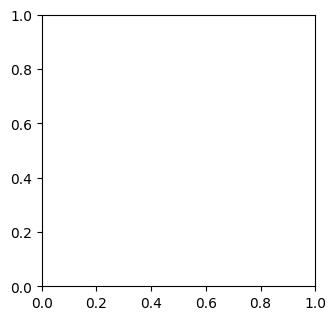

In [29]:
expression = 'disgusted'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [15]:
test_data = tf.keras.utils.image_dataset_from_directory(
    directory="../data/images/validation",  #? charge les images depuis ton dossier test
    labels='inferred',                 #? déduit les labels à partir des noms de sous-dossiers (angry, happy, etc.).
    label_mode='int',                  #? les labels seront des entiers (0, 1, 2...).
    image_size=(256, 256),             #? redimensionne toutes les images à 256×256.
    interpolation='nearest',
    batch_size=32,                     #? traite 32 images par batch.
    shuffle=True                       #? melange les images.
)

print("Classes :", test_data.class_names)


Found 7178 files belonging to 7 classes.
Classes : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [16]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory="../data/images/train",  
    labels='inferred',                
    label_mode='int',              
    image_size=(256, 256),           
    interpolation='nearest',
    batch_size=32,                    
    shuffle=True                       
)

print("Classes :", train_data.class_names)

Found 28709 files belonging to 7 classes.
Classes : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [17]:
class_name = test_data.class_names
class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [18]:
len(test_data)

225

In [19]:
len(train_data)

898

In [20]:

#! Verifier size d'images
for images_batch, labels_batch in test_data.take(1):  #? prend juste un batch
    print("Batch shape :", images_batch.shape)
    print("Label shape :", labels_batch.shape)
    print("Première image :", images_batch[0].shape)
    print("Premier label :", labels_batch[0].numpy())


Batch shape : (32, 256, 256, 3)
Label shape : (32,)
Première image : (256, 256, 3)
Premier label : 3


2025-11-09 15:37:27.642997: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
"""
  Ce code parcourt le premier lot (batch) d'images dans ton dataset test_data.
test_data.take(1) signifie prendre seulement 1 batch du dataset.
Chaque batch contient deux éléments :

image_size → les images (sous forme de tenseur, donc un tableau de pixels)

label → les étiquettes associées (par exemple “angry”, “happy”, etc.)

La ligne print(image_size) affiche donc le contenu du tenseur d'images,
c'est-à-dire les valeurs des pixels du premier batch.
"""
for image_size,label in test_data.take(1):
  print(image_size)

tf.Tensor(
[[[[ 42  42  42]
   [ 42  42  42]
   [ 42  42  42]
   ...
   [113 113 113]
   [113 113 113]
   [113 113 113]]

  [[ 42  42  42]
   [ 42  42  42]
   [ 42  42  42]
   ...
   [113 113 113]
   [113 113 113]
   [113 113 113]]

  [[ 42  42  42]
   [ 42  42  42]
   [ 42  42  42]
   ...
   [113 113 113]
   [113 113 113]
   [113 113 113]]

  ...

  [[ 50  50  50]
   [ 50  50  50]
   [ 50  50  50]
   ...
   [ 32  32  32]
   [ 32  32  32]
   [ 32  32  32]]

  [[ 50  50  50]
   [ 50  50  50]
   [ 50  50  50]
   ...
   [ 32  32  32]
   [ 32  32  32]
   [ 32  32  32]]

  [[ 50  50  50]
   [ 50  50  50]
   [ 50  50  50]
   ...
   [ 32  32  32]
   [ 32  32  32]
   [ 32  32  32]]]


 [[[ 73  73  73]
   [ 73  73  73]
   [ 73  73  73]
   ...
   [104 104 104]
   [104 104 104]
   [104 104 104]]

  [[ 73  73  73]
   [ 73  73  73]
   [ 73  73  73]
   ...
   [104 104 104]
   [104 104 104]
   [104 104 104]]

  [[ 73  73  73]
   [ 73  73  73]
   [ 73  73  73]
   ...
   [104 104 104]
   [104 104 104]


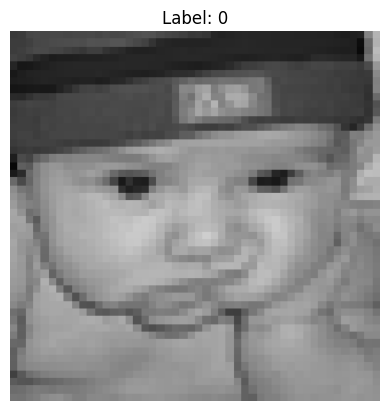

In [22]:
import matplotlib.pyplot as plt

for images, labels in test_data.take(1):
    plt.imshow(images[31].numpy().astype("uint8"))
    plt.title(f"Label: {labels[10].numpy()}")
    plt.axis("off")
    plt.show()
